# What Effect The Duration In The GoBike System?
## by Aya Tarek

## Investigation Overview

> In this Investigation we aim to check the features in the GoBike system dataset and discover the features that effect the duration of a bike trip.

## Dataset Overview

> There are 183412 GoBike trip in the dataset with 16 features to describe the trip like the Duration of the trip, some information about the start station and the end station, some information about the Users and the type of the Users.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [14]:
#Data wrangling
df_1 = df.copy()
#Remove unnecessary features
df_1.drop(['start_time', 'end_time', 'bike_id', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name'], axis=1, inplace=True)
#Drop the NAN rows
df_1.dropna(inplace=True)
#Change the Age Column from year to age
df_1['member_Age'] = df_1['member_birth_year']
df_1['member_Age'] = 2021 - df_1['member_birth_year'].astype(int)
#change duration_sec to Hours, as the visualization will be easier to interpret
df_1['duration_minutes'] = df_1['duration_sec'] / 60
#Drop the duration_sec and member_birth_year as it replaced with duration_minutes and member_Age
df_1.drop(['duration_sec', 'member_birth_year'], axis=1, inplace=True)
#change user_type and gender to category type
df_1.user_type = df_1.user_type.astype('category')
df_1.member_gender = df_1.member_gender.astype('category')

In [15]:
#Calculate the distance in kilometers, based on the longitude and latitude start and end points.
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d
#Add the  distance column to the datafram
df_1['distance'] = df_1.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

## Distribution of the Trip Duration in Ford GoBike System

> The distribution is skewed to the right (positively skewed), Indicates that the majority of the trips are less than 20 minutes long.

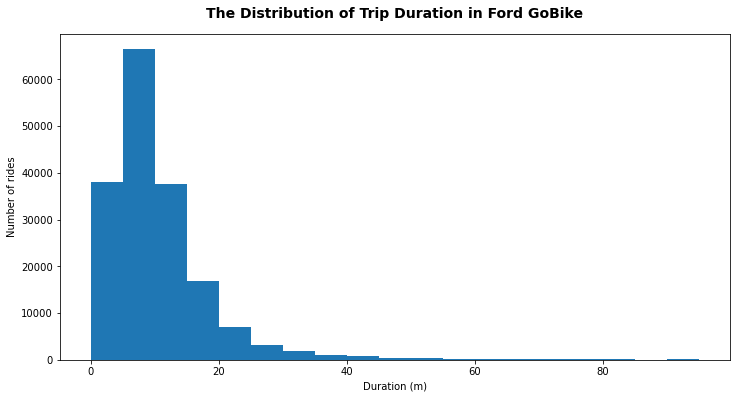

In [16]:
#Plot a histigram to explore the the distribution of the duration minutes column
plt.figure(figsize=[12,6])
bin_edges = np.arange(0, 100, 5)
plt.hist(data = df_1, x = 'duration_minutes', bins = bin_edges)

plt.title("The Distribution of Trip Duration in Ford GoBike", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (m)')
plt.ylabel('Number of rides');

## The Distribution of User Types in Ford GoBike Users
 >  The majority of the Users are subscribers, at 91%

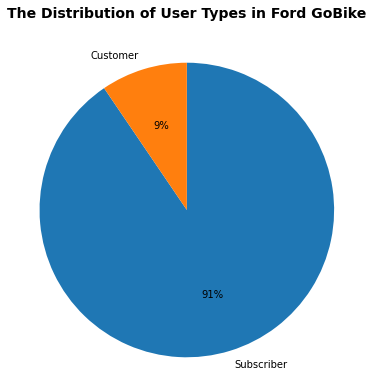

In [17]:
#Plot a pie chart to explore the distribution of the user type column
plt.figure(figsize=[12,6])
sorted_counts = df_1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False);
plt.title("The Distribution of User Types in Ford GoBike", fontsize=14, y=1.07, fontweight='semibold')
plt.axis('square');


## The Relation between The Distance and The Duration

> There is no specific relation found between the Distance and the Duration. But it obvious that most of the rides
with 1km distance takes about 10m duration.

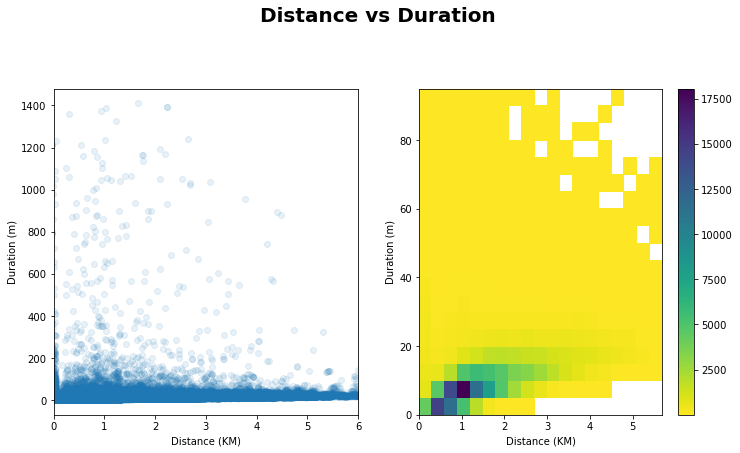

In [18]:
#Plot a scatter plot and heat map to explore the relation between duration and distance
bins_x = np.arange(0, 6, 0.3)
bins_y = np.arange(0, 100, 5)

plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)
sb.regplot(data = df_1, x = 'distance', y = 'duration_minutes', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlim([0,6])
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');

plt.subplot(1, 2, 2)
plt.hist2d(data = df_1, x = 'distance', y = 'duration_minutes', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');

plt.suptitle("Distance vs Duration", fontsize=20, y=1.07, fontweight='semibold' );


> There is no observed relation between the distance and duration shown in the scatter plot, But the heat maps shows that the most of the rides with 1km distance takes about 10m duration.

## Average Trip Duration per User Group

> It was very interset to discovre that customers spends more duration than the subscribers. But if you think of it the customers don't usually going on bike trips as a result they spend more time, unlike the subscribers who going on bike trips more often, it seems more sense. However, it was surprising to see that customers, on average, take longer duration than subscribers



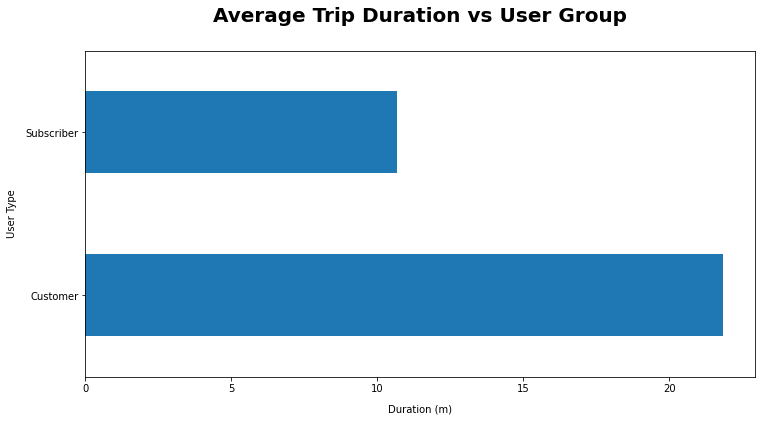

In [19]:
#Plot a bar chart to explore the relation between the user type and duration
ax = df_1.groupby('user_type')['duration_minutes'].mean().plot(kind='barh', figsize=(12,6))
ax.set_title('Average Trip Duration vs User Group', fontsize=20, y=1.07, fontweight='semibold')
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Duration (m)', labelpad=10);

## The Relation between Distance and Duration per User group
 > The Majority of the users are Subscribers with positive relationship between the Distance and the Duration

In [20]:
#Extract a sample from the dataset to explore the relations clearly
np.random.seed(2018)
sample=np.random.choice(df_1.shape[0], 200, replace=False)
df_1_subset=df_1.iloc[sample]

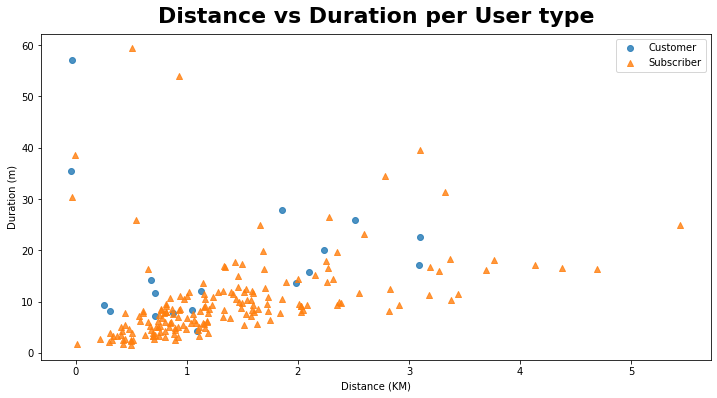

In [21]:
#Plot a scatter plot to explore the relation between distance and duration per User type
plt.figure(figsize=(12,6))
ttype_marker = [['Customer', 'o'], ['Subscriber', '^']]
for ttype, marker in ttype_marker:
    plot_data=df_1_subset.loc[df_1_subset['user_type']==ttype]
    sb.regplot(data = plot_data, x = 'distance', y = 'duration_minutes', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');  
plt.title('Distance vs Duration per User type', fontsize=22, y=1.015, fontweight='semibold')
plt.legend(['Customer','Subscriber']);

In [22]:
!jupyter nbconvert slide_deck_template_GoBike.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template_GoBike.ipynb to slides
[NbConvertApp] Writing 718882 bytes to slide_deck_template_GoBike.slides.html
